# Regression Project

Executive summary

## Problem Statement

Short problem statement

### Importing the data

In [2]:
# Import the necessary packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.correlation import plot_corr
from scipy.stats import pearsonr

In [3]:
datafile = '/Users/kofi/Desktop/Data_Science/Regression/Project/co2_emissions_from_agri.csv'

In [4]:
df = pd.read_csv(datafile)

## Exploratory Data Analysis

In [5]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [79]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

(6965, 31)

Create a copy of the data frame for analysis

In [6]:
df_copy = df.copy()

df_copy.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


Column names contain special characters and spaces. Total emission naming case differs from the rest. Set all to snake case for uniformity and ease of programming.

In [7]:
df_copy.columns = df_copy.columns.str.replace(' ', '_')  # Replace spaces with underscores
df_copy.columns = df_copy.columns.str.replace(r'[^\w\s]', '', regex=True)  # Remove non-alphanumeric characters (e.g., °, -)
df_copy.columns = df_copy.columns.str.lower()  # Convert to lowercase

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   area                             6965 non-null   object 
 1   year                             6965 non-null   int64  
 2   savanna_fires                    6934 non-null   float64
 3   forest_fires                     6872 non-null   float64
 4   crop_residues                    5576 non-null   float64
 5   rice_cultivation                 6965 non-null   float64
 6   drained_organic_soils_co2        6965 non-null   float64
 7   pesticides_manufacturing         6965 non-null   float64
 8   food_transport                   6965 non-null   float64
 9   forestland                       6472 non-null   float64
 10  net_forest_conversion            6472 non-null   float64
 11  food_household_consumption       6492 non-null   float64
 12  food_retail         

Filtering to South Africa

In [80]:
df_sa = df_copy[df_copy['area'] == 'South Africa']

df_sa.info()
df_sa.shape

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 5844 to 5874
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   area                             31 non-null     object 
 1   year                             31 non-null     int64  
 2   savanna_fires                    31 non-null     float64
 3   forest_fires                     31 non-null     float64
 4   crop_residues                    31 non-null     float64
 5   rice_cultivation                 31 non-null     float64
 6   drained_organic_soils_co2        31 non-null     float64
 7   pesticides_manufacturing         31 non-null     float64
 8   food_transport                   31 non-null     float64
 9   forestland                       31 non-null     float64
 10  net_forest_conversion            31 non-null     float64
 11  food_household_consumption       31 non-null     float64
 12  food_retail             

(31, 31)

In [11]:
df_sa.describe().T

,count,mean,std,min,25%,50%,75%,max
year,31.0,2.005000e+03,9.092121e+00,1.990000e+03,1.997500e+03,2.005000e+03,2.012500e+03,2.020000e+03
savanna_fires,31.0,2.382101e+03,5.104930e+02,1.204857e+03,2.117280e+03,2.431384e+03,2.785500e+03,3.397692e+03
forest_fires,31.0,4.908740e+02,6.312044e+02,6.033050e+01,1.336182e+02,2.280387e+02,4.793386e+02,2.804083e+03
crop_residues,31.0,6.831744e+02,1.264757e+02,3.689217e+02,6.075664e+02,6.889056e+02,7.489228e+02,9.437101e+02
rice_cultivation,31.0,9.823774e+00,8.931082e-01,8.561300e+00,9.000300e+00,9.901900e+00,1.058010e+01,1.130530e+01
drained_organic_soils_co2,31.0,4.742654e+02,5.056727e+01,3.964039e+02,4.156825e+02,5.087522e+02,5.150563e+02,5.154438e+02
pesticides_manufacturing,31.0,9.572581e+02,2.177053e+02,6.340000e+02,8.475000e+02,9.760000e+02,1.004500e+03,1.453000e+03
food_transport,31.0,4.509776e+03,1.027013e+03,2.724897e+03,3.813660e+03,4.547811e+03,5.378898e+03,6.090568e+03
forestland,31.0,-6.402388e+02,7.511068e+01,-7.582120e+02,-6.518633e+02,-6.518633e+02,-6.385166e+02,-5.001360e+02
net_forest_conversion,31.0,6.640828e+03,1.304767e+01,6.626620e+03,6.626620e+03,6.639967e+03,6.653313e+03,6.661321e+03


### Selecting Variables

In [28]:
# Create a dataframe with numeric values only
df_sa_numeric = df_sa.select_dtypes(include=[float, int])

sns.pairplot(df_sa_numeric)
plt.suptitle('SA Data Pairplot')
plt.show()

From the above pairplot, we see that there seems to be linear and unbiased relationships between Average Temperature and Total Emission, Urban Population, Manure Management, Year, Rice Cultivation, and IPPU.

In [70]:
# Create the X and y variables
X = df_sa[['total_emission', 'urban_population', 'manure_management', 'year', 'rice_cultivation', 'ippu']]
y = df_sa['average_temperature_c']

In [71]:
# Investigate for multicollinearity
X.corr()

,total_emission,urban_population,manure_management,year,rice_cultivation,ippu
total_emission,1.000000,0.965707,0.224916,0.970254,-0.849529,0.954469
urban_population,0.965707,1.000000,0.087872,0.999110,-0.873623,0.895163
manure_management,0.224916,0.087872,1.000000,0.124674,-0.141446,0.199182
year,0.970254,0.999110,0.124674,1.000000,-0.874861,0.898830
rice_cultivation,-0.849529,-0.873623,-0.141446,-0.874861,1.000000,-0.726122
ippu,0.954469,0.895163,0.199182,0.898830,-0.726122,1.000000


From the above correlations table, we can see that Total Emission, Year, and Urban Population are exposed to multicollinearity. Let us see what the correlations look like with total emission and year dropped.

In [65]:
# Dropped 
X.drop(columns=['total_emission', 'year']).corr()

,urban_population,manure_management,rice_cultivation,ippu
urban_population,1.000000,0.087872,-0.873623,0.895163
manure_management,0.087872,1.000000,-0.141446,0.199182
rice_cultivation,-0.873623,-0.141446,1.000000,-0.726122
ippu,0.895163,0.199182,-0.726122,1.000000


Without variables Total Emission and Year, multicollinearity seems fairly reduced.

In [72]:
# Drop total emission

X.drop(columns=['total_emission'], inplace=True)

/var/folders/lk/hdr659v911b8xpx177xtj9v40000gn/T/ipykernel_77440/236543090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['total_emission'], inplace=True)


In [73]:
# set year to index

X.set_index('year', inplace=True)

X.head()

,urban_population,manure_management,rice_cultivation,ippu
year,,,,
1990,19545369.0,924.1691,9.3374,11545.2605
1991,20200588.0,933.2771,11.3053,10957.4654
1992,20876052.0,923.8413,11.1877,12373.1494
1993,21569090.0,897.1473,11.0779,12703.7936
1994,22259757.0,885.3551,10.9682,14264.6096


Now, we create the formula string to generate the OLS summary

In [75]:
# Create the formula string
formula_str = str(y.name) + ' ~ ' + ' + '.join([str(x) for x in X])
formula_str

'average_temperature_c ~ urban_population + manure_management + rice_cultivation + ippu'

In [77]:
ols_model = sm.ols(formula=formula_str, data=df_sa_numeric)
fitted = ols_model.fit()

print(fitted.summary())

                              OLS Regression Results                             
Dep. Variable:     average_temperature_c   R-squared:                       0.424
Model:                               OLS   Adj. R-squared:                  0.336
Method:                    Least Squares   F-statistic:                     4.793
Date:                   Sat, 09 Nov 2024   Prob (F-statistic):            0.00496
Time:                           17:47:46   Log-Likelihood:                -6.5871
No. Observations:                     31   AIC:                             23.17
Df Residuals:                         26   BIC:                             30.34
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercep

The OLS regression results suggests that there may still be multicollinearity to keep in mind. 

## Regression Modelling

As we have already created the X and y variables, now we need to split the data between train and test values. Before that, we will standardise the data using the StandardScaler method.

In [82]:
# Scale the data
scaler = StandardScaler()

X_std = scaler.fit_transform(X)

X_std

array([[-1.6634787 , -0.62137312, -0.55358798, -2.11664336],
       [-1.55120459, -0.32214847,  1.68626314, -2.31172323],
       [-1.43546143, -0.63214231,  1.55241158, -1.84188018],
       [-1.3167069 , -1.50911888,  1.42743792, -1.73214462],
       [-1.19835865, -1.8965274 ,  1.30257809, -1.21413456],
       [-1.08316417, -1.1473488 ,  1.17760444, -0.9495867 ],
       [-0.97209553, -0.54141561,  1.05263078, -0.31210307],
       [-0.86465085,  0.10299166,  0.94564059, -0.04661996],
       [-0.7600916 ,  0.50889967,  0.70468501, -0.10097757],
       [-0.65718573,  0.09890804,  0.08892229, -0.18998471],
       [-0.5548611 ,  0.18431913,  0.46372943, -0.57299058],
       [-0.45290522,  0.54792241,  1.311456  , -0.81319749],
       [-0.34719155,  0.76805358,  0.17815667, -0.26386275],
       [-0.24067269,  0.51409044,  0.77604975,  0.19364576],
       [-0.13550873,  0.38683126,  0.34774751,  0.40777521],
       [-0.03213267,  0.14650867,  0.18714839,  0.56755349],
       [ 0.06917121, -0.

Now we will be splitting the data into an 80-20 split for training and testing.

In [85]:
# Split the data, 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

### Linear Regression

We will first create a Linear regression model to predict y values. 

In [92]:
# Create a function to run the Linear model
def linear_fit(X_train, X_test, y_train, y_test):
    '''Fits a Linear Regression model to the training data and evaluates it on both the training and test data.

    This function trains a linear regression model using the training data (`X_train`, `y_train`) and 
    evaluates it on both the training data and test data (`X_test`, `y_test`). It then computes the 
    Mean Squared Error (MSE) and the R-squared score for both the training and test data to assess 
    the model's performance.

    Parameters
    ----------
    X_train : array-like, shape (n_samples, n_features)
        Training data, where `n_samples` is the number of samples and 
        `n_features` is the number of features.

    X_test : array-like, shape (n_samples, n_features)
        Test data, where `n_samples` is the number of samples and 
        `n_features` is the number of features.

    y_train : array-like, shape (n_samples,)
        Target values for the training data.

    y_test : array-like, shape (n_samples,)
        True target values for the test data.

    Returns
    -------
    dict
        A dictionary containing the following metrics:
        
        - `train_mse` : float
            The Mean Squared Error (MSE) on the training data.
            
        - `train_r2` : float
            The R-squared score on the training data.
            
        - `test_mse` : float
            The Mean Squared Error (MSE) on the test data.
            
        - `test_r2` : float
            The R-squared score on the test data.
            
    Notes
    -----
    The function assumes that the input data is preprocessed (e.g., standardized) if necessary.
    '''
    # Initiate the linear regression model
    lm = LinearRegression()
        
    # Fit the model
    lm.fit(X_train, y_train)

    #predict y_train values
    y_train_pred = lm.predict(X_train)

    # Evaluate the model on training data
    train_mse = round(mean_squared_error(y_train, y_train_pred), 4)
    train_r2 = round(r2_score(y_train, y_train_pred), 4)

    # Predict y_test values
    y_test_pred = lm.predict(X_test)

    # Evaluate the model on test data
    test_mse = round(mean_squared_error(y_test, y_test_pred), 4)
    test_r2 = round(r2_score(y_test, y_test_pred), 4)

    return {'train_mse': train_mse,
        'train_r2': train_r2,
        'test_mse': test_mse,
        'test_r2': test_r2}

    

In [97]:
# Run the linear regression model
linear_fit(X_train, X_test, y_train, y_test)

{'train_mse': np.float64(0.0769),
 'train_r2': 0.4718,
 'test_mse': np.float64(0.1686),
 'test_r2': -0.4297}

The results of the linear model uncovers overfitting of the data, as the test MSE is higher than the train MSE, and the test R2 is negative. This model is not generalising well on new data.

### Ridge Regression

We will be using the Ridge regression model to address the multicollinearity we discovered earlier. 

In [112]:
# Create a function to run the Ridge regression model
def ridge_fit(X_train, X_test, y_train, y_test):
    '''Fits a Ridge Regression model to the training data and evaluates it on both the training and test data.

    This function trains a Ridge Regression model using the training data (`X_train`, `y_train`) and 
    evaluates it on both the training data and test data (`X_test`, `y_test`). It then computes the 
    Mean Squared Error (MSE) and the R-squared score for both the training and test data to assess 
    the model's performance. The `alpha` parameter controls the regularization strength.

    Parameters
    ----------
    X_train : array-like, shape (n_samples, n_features)
        Training data, where `n_samples` is the number of samples and 
        `n_features` is the number of features.

    X_test : array-like, shape (n_samples, n_features)
        Test data, where `n_samples` is the number of samples and 
        `n_features` is the number of features.

    y_train : array-like, shape (n_samples,)
        Target values for the training data.

    y_test : array-like, shape (n_samples,)
        True target values for the test data.

    alpha : float, optional (default=1.0)
        Regularization strength. A higher value of `alpha` increases the amount of regularization
        applied to the model, which can help reduce overfitting. Smaller values of `alpha` result in 
        a model closer to ordinary linear regression (no regularization).

    Returns
    -------
    dict
        A dictionary containing the following metrics:
        
        - `train_mse` : float
            The Mean Squared Error (MSE) on the training data.
            
        - `train_r2` : float
            The R-squared score on the training data.
            
        - `test_mse` : float
            The Mean Squared Error (MSE) on the test data.
            
        - `test_r2` : float
            The R-squared score on the test data.
            
    Notes
    -----
    The function assumes that the input data is preprocessed (e.g., standardized) if necessary.
    Ridge regression applies regularization to prevent overfitting, which is controlled by the `alpha` parameter.
    Larger values of `alpha` result in stronger regularization, making the model more biased but less likely to overfit.
    '''
    
    # Initiate the Ridge model with an alpha of 1
    ridge = Ridge(alpha=50)

    # Fit the model
    ridge.fit(X_train, y_train)

    # Predict y_train values
    y_train_pred = ridge.predict(X_train)

    # Evaluate the model on training data
    train_mse = round(mean_squared_error(y_train, y_train_pred), 4)
    train_r2 = round(r2_score(y_train, y_train_pred), 4)

    # Predict y_test values
    y_test_pred = ridge.predict(X_test)

    # Evaluate the model on test data
    test_mse = round(mean_squared_error(y_test, y_test_pred), 4)
    test_r2 = round(r2_score(y_test, y_test_pred), 4)

    # Return the evaluation metrics as a dictionary
    return {'train_mse': train_mse,
            'train_r2': train_r2,
            'test_mse': test_mse,
            'test_r2': test_r2}

In [113]:
# Run the Ridge regression model
ridge_fit(X_train, X_test, y_train, y_test)

{'train_mse': np.float64(0.102),
 'train_r2': 0.2995,
 'test_mse': np.float64(0.1484),
 'test_r2': -0.2584}

We can see that the test MSE has performed better with the Ridge Regression model, however the R2 score is still negative, indicating that the model still might not be a good fit. 

## Decision Tree Analysis

Keeping in mind the disadvantages outlined above for Ridge Regression and Linear Regression - we decided to take a look at how we can use Decision Tree Analysis to potentionally improve on those deficiencies within the other models.

With Decision Tree Analysis we will be taking advantage of its simplicity and ease of understanding.Furthermore, we will not be required to perform feature scaling in this model as Decision Trees are not sensitive to the scale of the data, which simplifies preprocessing. Lastly, with implemeting this model - we are able to account for both Numerical and non - numerical data via classification or regression. On the other hand -one thing to keep in mind when implementing the Decision Tree Analysis, is that Decision trees can lead to overfitting depending on how deep we make the tree and vice versa can lead to underfitting if our tree is too shallow.

In [3]:
df = pd.read_csv('/Users/imran/Documents/Regression project/ExploreAI-Regression-Project/co2_emissions_from_agri.csv')
df.head(5)

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [4]:
# Print the first few rows of the dataset
SA_DF=df[df["Area"] =="South Africa"]

print("First few rows of the dataset:")
print(SA_DF.head())

# Print the summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(SA_DF.describe().T)

# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(SA_DF.isnull().sum())

# Exclude non-numeric columns before computing the correlation matrix
numeric_columns_ = SA_DF.select_dtypes(include=[np.number])


First few rows of the dataset:
              Area  Year  Savanna fires  Forest fires  Crop Residues  \
5844  South Africa  1990      2431.3837      479.3386       646.3320   
5845  South Africa  1991      2431.3837      479.3386       635.1172   
5846  South Africa  1992      2431.3837      479.3386       368.9217   
5847  South Africa  1993      2431.3837      479.3386       688.9056   
5848  South Africa  1994      2431.3837      479.3386       811.6654   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
5844            9.3374                     396.4039                     638.0   
5845           11.3053                     396.4039                     634.0   
5846           11.1877                     396.4039                     640.0   
5847           11.0779                     396.4039                     652.0   
5848           10.9682                     396.4039                     646.0   

      Food Transport  Forestland  ...  Manure Man

We can see from the above we have no NULL values

In [5]:
#correlation Matrix
numeric_columns_.corr()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
Year,1.000000,-0.532129,-0.430401,0.518652,-0.874861,0.885915,0.405173,0.861836,0.277002,0.952548,...,0.124674,NaN,-0.395440,0.846059,0.446792,0.999110,0.995079,0.992774,0.970254,0.613547
Savanna fires,-0.532129,1.000000,0.509667,-0.119570,0.410539,-0.387399,-0.066732,-0.300912,-0.411104,-0.611267,...,0.397745,NaN,0.438228,-0.529211,0.093429,-0.545674,-0.571809,-0.508086,-0.437492,-0.554759
Forest fires,-0.430401,0.509667,1.000000,-0.192603,0.356283,-0.522511,-0.229364,-0.361237,-0.022136,-0.525045,...,-0.079657,NaN,0.765230,-0.227172,-0.016065,-0.417926,-0.418542,-0.359754,-0.296274,-0.186574
Crop Residues,0.518652,-0.119570,-0.192603,1.000000,-0.542065,0.342486,0.145155,0.435530,0.196774,0.490565,...,-0.133296,NaN,-0.206320,0.539068,0.092291,0.526590,0.525537,0.518935,0.481313,0.025496
Rice Cultivation,-0.874861,0.410539,0.356283,-0.542065,1.000000,-0.756802,-0.237289,-0.746187,-0.184309,-0.847087,...,-0.141446,NaN,0.320416,-0.751665,-0.208445,-0.873623,-0.873591,-0.847102,-0.849529,-0.535005
Drained organic soils (CO2),0.885915,-0.387399,-0.522511,0.342486,-0.756802,1.000000,0.626204,0.847814,0.097676,0.811286,...,0.433270,NaN,-0.433998,0.567962,0.631839,0.869000,0.843050,0.863923,0.898576,0.506295
Pesticides Manufacturing,0.405173,-0.066732,-0.229364,0.145155,-0.237289,0.626204,1.000000,0.399279,0.039320,0.336623,...,0.431561,NaN,-0.287510,0.183326,0.774667,0.392544,0.354880,0.434922,0.437882,0.260249
Food Transport,0.861836,-0.300912,-0.361237,0.435530,-0.746187,0.847814,0.399279,1.000000,-0.028141,0.752268,...,0.326112,NaN,-0.314349,0.675629,0.535317,0.850323,0.830490,0.851775,0.903268,0.426276
Forestland,0.277002,-0.411104,-0.022136,0.196774,-0.184309,0.097676,0.039320,-0.028141,1.000000,0.299080,...,-0.558503,NaN,-0.133397,0.227548,-0.052233,0.300842,0.306551,0.293832,0.215236,0.396551
Net Forest conversion,0.952548,-0.611267,-0.525045,0.490565,-0.847087,0.811286,0.336623,0.752268,0.299080,1.000000,...,0.026821,NaN,-0.460684,0.873257,0.287338,0.955663,0.960389,0.932692,0.880857,0.597954


Interestingly enough we can see that although initially the stats where showing no Null  values - we can see the 
correlation matrix showing Fires in Organic soils as NAN - this is because NAN is still seen as an integer using np.number i.e. the panda module whereas the corr func does not

In [6]:
#look at variables that are potentially highly correlated: Should exclude these pairings

import pandas as pd
corr_matrix = numeric_columns_.corr()
# Get pairs of features that are highly correlated
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)
print("Highly correlated features:", correlated_features)

Highly correlated features: {'Total Population - Male', 'total_emission', 'Total Population - Female', 'Urban population', 'Food Household Consumption', 'IPPU', 'Food Retail', 'Net Forest conversion'}


### DECISION TREE VS RANDOM FOREST

In [21]:
#Decision Tree:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

#select features not deemed highly correlated
X = SA_DF[["Year", "Crop Residues","Manure Management","Rice Cultivation"]]  # Features
y = SA_DF["Average Temperature °C"]  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Decision Tree Regressor in this case + depth
model = DecisionTreeRegressor(random_state=42, max_depth = 5)

# Fit the model with scaled training data
model.fit(X_train, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.2416563782242064
R-squared: -1.0491808339888475


Given the negative R² score, our model's performance is poor. we should consider adjusting the model, trying to find the ideal max depth as well perform additional feature engineering to improve accuracy as the current features selected may not have a strong relationship with Average Temperature

### RANDOM FOREST - Ensambling

Trying to improve on the above decision tree - we will implement the Random Forest Ensamble method that builds multiple decision trees on different subsets of the training data.This will average the results (in regression) from all the trees to make a final prediction. The goal is to achieve higher accuracy and a more robust model that generalizes well on unseen data.


In [37]:
#Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = SA_DF[["Year", "Crop Residues","Manure Management","Rice Cultivation"]]  # Features
y = SA_DF["Average Temperature °C"]  # Target

# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model - depth 5 , number of trees 200
model = RandomForestRegressor(random_state=42, max_depth = 5 ,  n_estimators=200)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.15
R-squared: -0.23


Despite improvements on both MSE and R² compared to that of the decision tree, the R² is still negative after performing the random forest regression which still indicates the model's performance is poor. This can still imply that either our model is still underfitting(too simple) or overfitting(too complex), Furthermore, the variables selected still may need to be relooked at and potentially needs to be relooked at which we will check now in terms of feature engineering.

We will take a look at how each feature correlates to Ave Temperate

Correlation with Average Temperature °C:
 Average Temperature °C             1.000000
Total Population - Male            0.643600
Urban population                   0.623006
Year                               0.613547
Total Population - Female          0.612078
Food Retail                        0.611720
Net Forest conversion              0.597954
total_emission                     0.570945
On-farm energy use                 0.559500
On-farm Electricity Use            0.535185
Food Household Consumption         0.530848
IPPU                               0.528623
Drained organic soils (CO2)        0.506295
Food Packaging                     0.476682
Food Transport                     0.426276
Forestland                         0.396551
Agrifood Systems Waste Disposal    0.337443
Pesticides Manufacturing           0.260249
Fertilizers Manufacturing          0.231989
Rural population                   0.144414
Manure applied to Soils            0.140778
Food Processing                   

C:\Users\imran\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


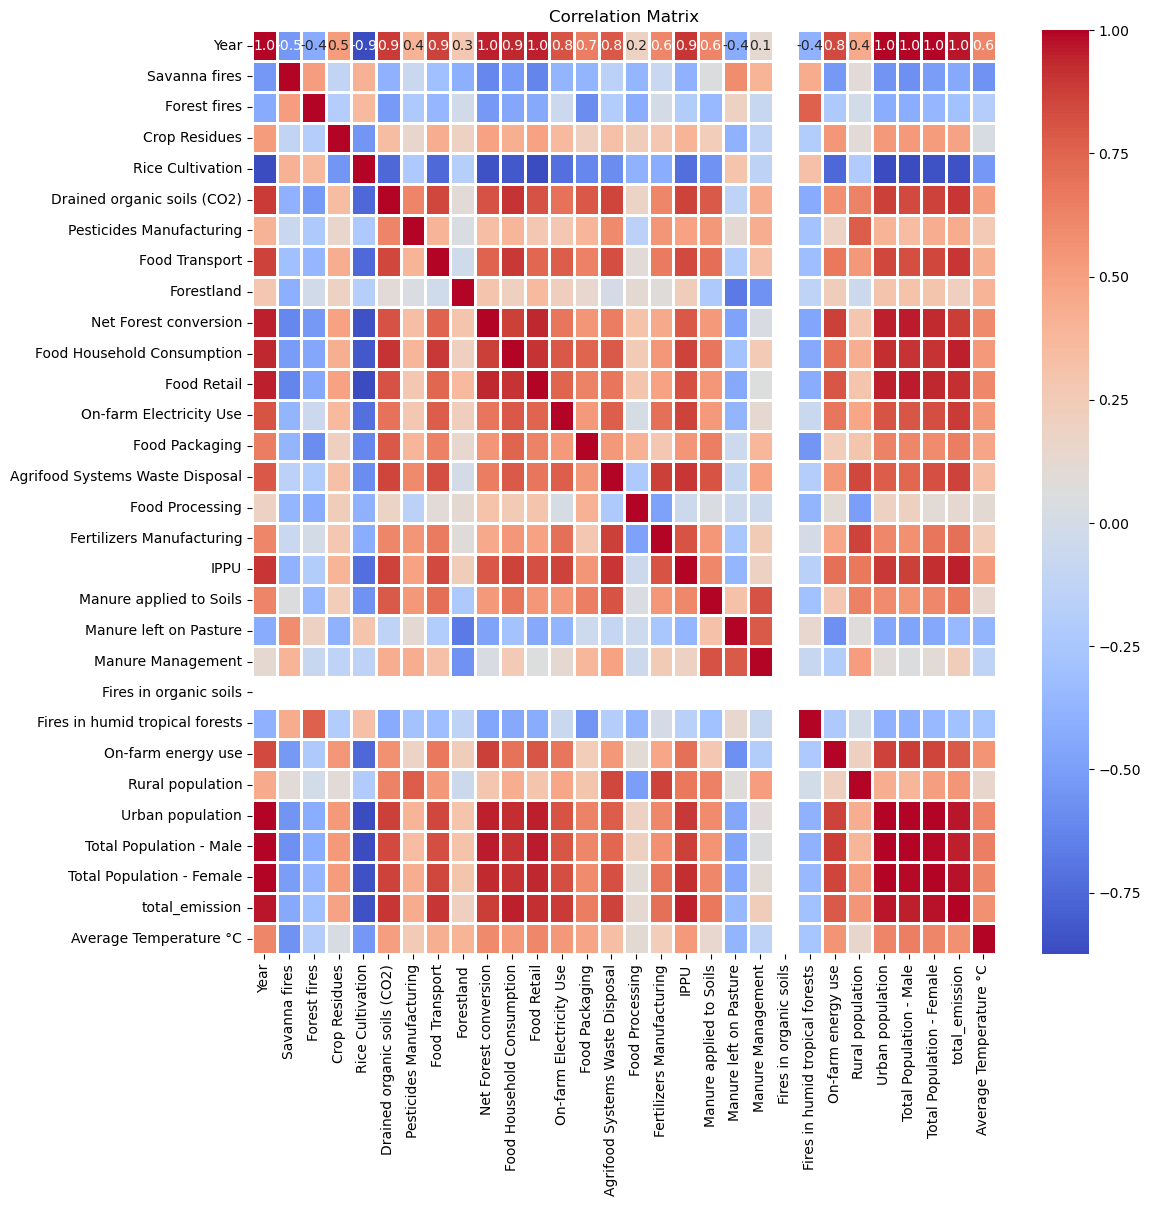

In [39]:
non_numeric_dataset = SA_DF.drop(columns = ["Area"])
correlation_matrix = non_numeric_dataset.corr()
print("Correlation with Average Temperature °C:\n", correlation_matrix["Average Temperature °C"].sort_values(ascending=False))


# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".01f", linewidths=1)
plt.title('Correlation Matrix')
plt.show()

We will now train and test the model of all features ( model 1 ) vs model of selected features ( model 2)

In [73]:
#model 1

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns
import matplotlib.pyplot as plt

#fill NAN figures
df_clean = SA_DF.fillna(0)

# Drop non-numeric columns
non_numeric_columns = ["Area"]
#split data into dependent and independent variables consider all variables
X = df_clean.drop(columns=["Average Temperature °C"] + non_numeric_columns)
y = df_clean["Average Temperature °C"]

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeRegressor(max_depth=1, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

result = {'mse': mse, 'r2': r2, 'model_depth': model.get_depth()}
result



{'mse': 0.15522957125829925, 'r2': -0.316304848348298, 'model_depth': 1}

For Model 1 : We can see that with a max depth of 1, this would result in the largest R² and smallest MSE value respectively. Again, we can see that the R2 value is still negative which indicates this model is performing poorly.

In [43]:
# Define a range of depths to try
depths_to_try = range(1, 11)

# Initialise empty lists to store results
mse_scores = []
r2_scores = []

# Iterate over depths and fit models
for depth in depths_to_try:
    # Train the model
    model = DecisionTreeRegressor(max_depth=depth, random_state=42).fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Append scores to lists
    mse_scores.append(mse)
    r2_scores.append(r2)

# Print the results
for depth, mse, r2 in zip(depths_to_try, mse_scores, r2_scores):
    print(f"Depth: {depth}, MSE: {mse}, R2: {r2}")

Depth: 1, MSE: 0.15522957125829925, R2: -0.316304848348298
Depth: 2, MSE: 0.303900740218874, R2: -1.5769962161468847
Depth: 3, MSE: 0.38376512692836007, R2: -2.2542246500329273
Depth: 4, MSE: 0.3185334252590844, R2: -1.7010774340917085
Depth: 5, MSE: 0.2891921954365079, R2: -1.452271728072636
Depth: 6, MSE: 0.3889704134272756, R2: -2.29836407398433
Depth: 7, MSE: 0.4384056706746032, R2: -2.7175617066681443
Depth: 8, MSE: 0.2915089811507937, R2: -1.4719174453388644
Depth: 9, MSE: 0.4416807827380952, R2: -2.7453337726032174
Depth: 10, MSE: 0.4416807827380952, R2: -2.7453337726032174


We can confirm that a depth of 1 would result in the best MSE and R² despite it still resulting in poor model performance

Let us now amend a) feature selection and b) max depth and see what impact this will have on Model 2

In [71]:
#model 2

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the features to keep based on correlation analysis - selected features mid table i.e. not very + correlated
features_to_keep_ = ["Pesticides Manufacturing","Rural population","Manure applied to Soils","Food Processing"]

# Prepare the dataset with only the selected features
X = df_clean[features_to_keep_]
y = df_clean["Average Temperature °C"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
model = DecisionTreeRegressor(max_depth=2, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Store the results
result = {'mse': mse, 'r2': r2, 'model_depth': model.get_depth()}
result

{'mse': 0.0987325362425289, 'r2': 0.16277475295277233, 'model_depth': 2}

Model 2: We can see that in this instance we have a positive MSE and now positive R² taking into that we implemented featuring engineering i.e amending our feature selection based off the correlation as well as amending the depth of our trees which resulted in the best output for this model. Although both MSE and R² are postive, there is still room for improvement - this model only explains about 16.28% of the variance in the target variable. Still an improvement from Model 1

In [72]:
# Define a range of depths to try
depths_to_try = range(1, 11)

# Initialise empty lists to store results
mse_scores = []
r2_scores = []

# Iterate over depths and fit models
for depth in depths_to_try:
    # Train the model
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Append scores to lists
    mse_scores.append(mse)
    r2_scores.append(r2)

# Print the results
for depth, mse, r2 in zip(depths_to_try, mse_scores, r2_scores):
    print(f"Depth: {depth}, MSE: {mse}, R2: {r2}")

Depth: 1, MSE: 0.156108339938249, R2: -0.32375656946443554
Depth: 2, MSE: 0.0987325362425289, R2: 0.16277475295277233
Depth: 3, MSE: 0.205139202923556, R2: -0.7395250480030258
Depth: 4, MSE: 0.28662142239087307, R2: -1.4304722668195895
Depth: 5, MSE: 0.2843029268353175, R2: -1.4108120505610935
Depth: 6, MSE: 0.28337861485890653, R2: -1.4029741345888103
Depth: 7, MSE: 0.28336804662698417, R2: -1.402884518835799
Depth: 8, MSE: 0.28386596726190483, R2: -1.4071067513687239
Depth: 9, MSE: 0.28386596726190483, R2: -1.4071067513687239
Depth: 10, MSE: 0.28386596726190483, R2: -1.4071067513687239


We can confirm a max depth of 2 would be the best result for this model when accounting for the selected features resulting in the lowest MSE and Highest positive R2

### Conclusion 

Comparing model 1 and 2 - we can see that Model 2 has a lower MSE as well as a positive R² value and is outperforming model 1

This implies that compared to the negative R² in model 1 , which illustrated poor model performance, model 2 was able to explain about 16.28% of the variance in the target variable. Although the results were positive , there is still plenty of room for improvement in this Decision Tree model. We were able to see that through feature engineering, finding the most efficient Tree depth and Ensambling(via Random Forest) - these were able to contribute to making the model more accurate.

Although Decision trees are prone to overfitting , with the continuous improvement on feature selection, better fine tuning the ensambling via Random Forest and dealing with data issues i.e. noise and missing data - this model can become more accurate.